# Лабораторная работа 1

РАСПРЕДЕЛЕНИЕ ХИ-КВАДРАТ
Первые 10 значений выборки: [11.08995291  2.77034707  2.95699999  1.87994412 11.76680926  2.45649534
 10.2201283   0.6578882   8.60135622  1.8348877 ]


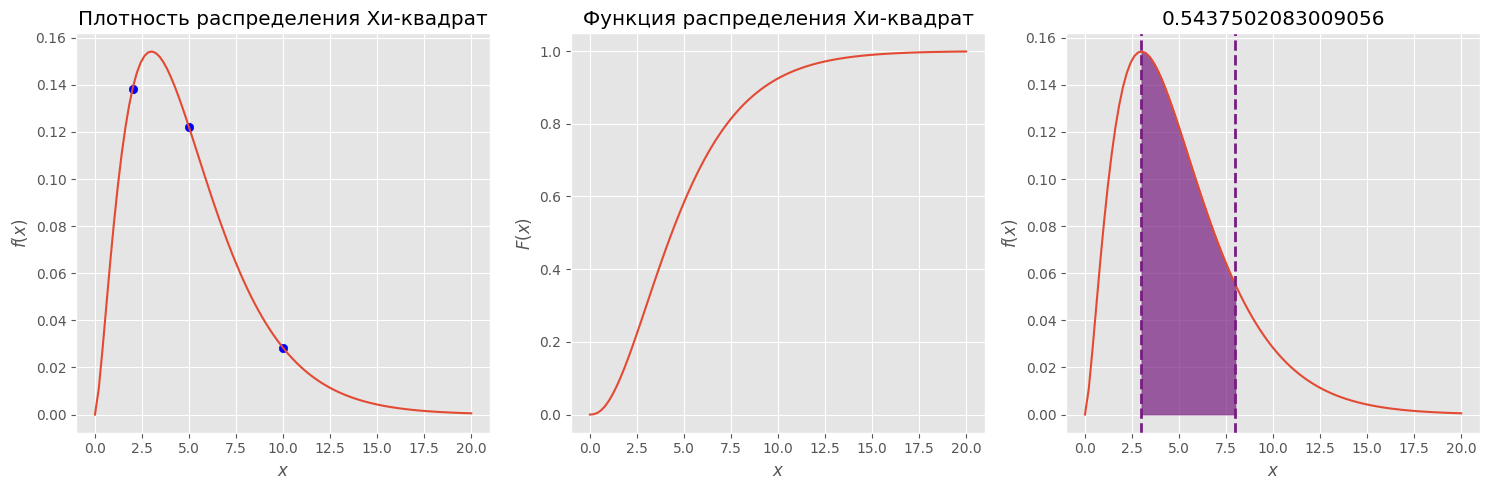

95%-квантиль распределения Хи-квадрат: 11.070


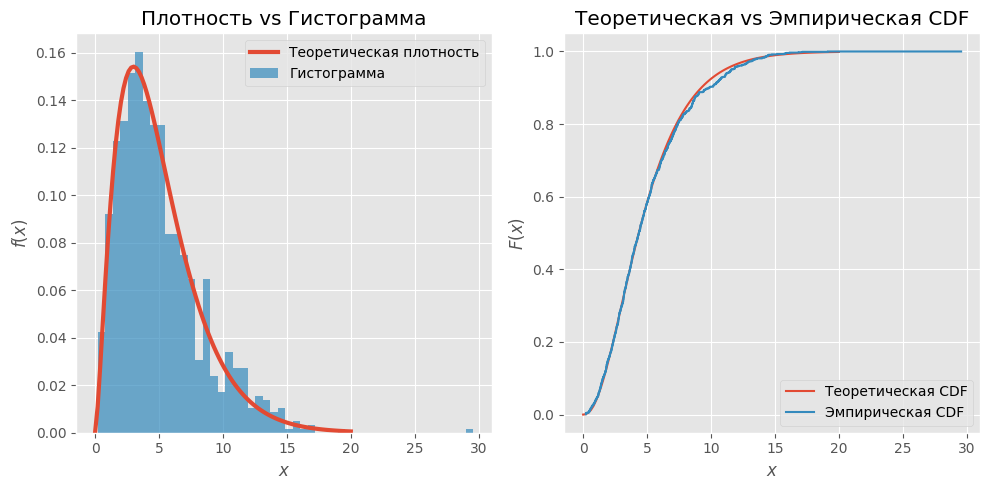

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use('ggplot')  # стиль графиков

print("=" * 50)
print("РАСПРЕДЕЛЕНИЕ ХИ-КВАДРАТ")
print("=" * 50)

# 1. Хи-квадрат распределение (степени свободы = 5)
chi2_rv = stats.chi2(df=5)  # генератор распределения Хи-квадрат

sample_chi2 = chi2_rv.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print("Первые 10 значений выборки:", sample_chi2[:10])

# Плотность распределения
x_chi2 = np.linspace(0, 20, 100)
pdf_chi2 = chi2_rv.pdf(x_chi2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_chi2, pdf_chi2)
plt.title('Плотность распределения Хи-квадрат')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Отметим несколько точек
points = [2, 5, 10]
plt.scatter(points, chi2_rv.pdf(points), color="blue")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_chi2 = chi2_rv.cdf(x_chi2)
plt.plot(x_chi2, cdf_chi2)

number = chi2_rv.cdf(8) - chi2_rv.cdf(3)

plt.title('Функция распределения Хи-квадрат')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_chi2, pdf_chi2)
plt.title('Вероятность P(3 < X < 8)')
plt.title(number)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Закрасим область между 3 и 8
xq_chi2 = np.linspace(3, 8, 100)
yq_chi2 = chi2_rv.pdf(xq_chi2)
plt.fill_between(xq_chi2, 0, yq_chi2, color="#771D80", alpha=0.7)

plt.axvline(3, color='#771D80', linestyle="--", lw=2)
plt.axvline(8, color='#771D80', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
uroven_chi2 = 0.95
q_chi2 = chi2_rv.ppf(uroven_chi2)
print(f"95%-квантиль распределения Хи-квадрат: {q_chi2:.3f}")

# Сравнение теоретической плотности и гистограммы
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_chi2, pdf_chi2, lw=3, label='Теоретическая плотность')
plt.hist(sample_chi2, bins=50, density=True, alpha=0.7, label='Гистограмма')
plt.title('Плотность vs Гистограмма')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

# Сравнение теоретической и эмпирической функций распределения
plt.subplot(1, 2, 2)
plt.plot(x_chi2, cdf_chi2, label='Теоретическая CDF')
ecdf_chi2 = ECDF(sample_chi2)
plt.step(ecdf_chi2.x, ecdf_chi2.y, label='Эмпирическая CDF')
plt.title('Теоретическая vs Эмпирическая CDF')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show()


РАСПРЕДЕЛЕНИЕ СТЬЮДЕНТА
Первые 10 значений выборки: [ 1.95097872 -0.92471806 -0.71724277 -1.92030695  0.35025726 -0.61933354
 -0.36575983  0.69476192 -0.22202897  1.83845074]


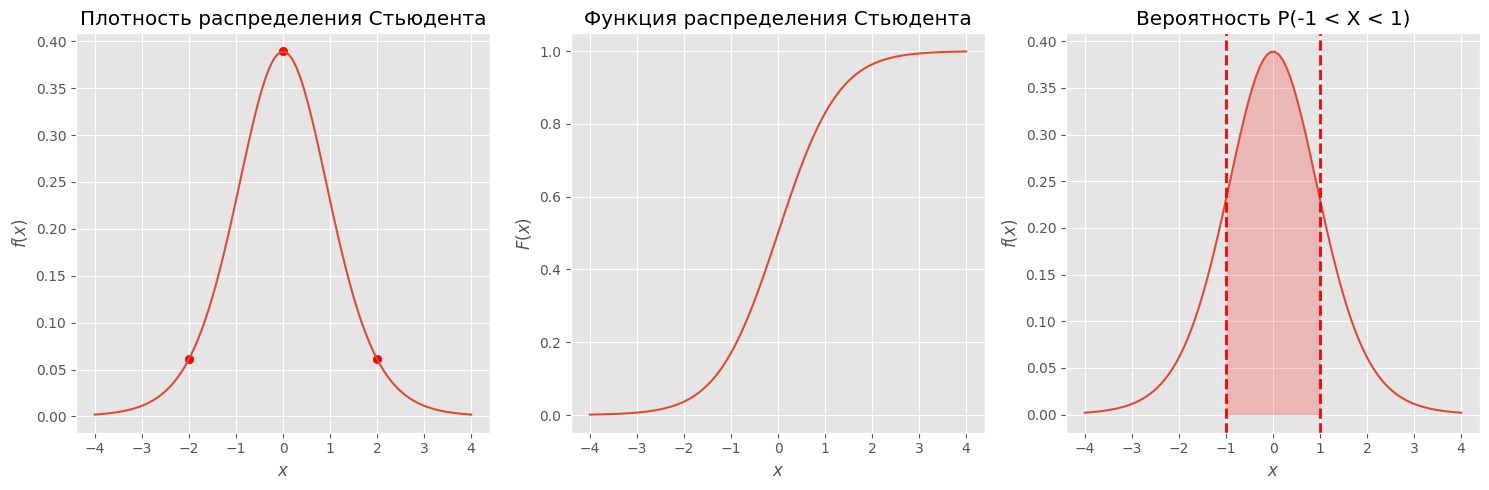

97.5%-квантиль распределения Стьюдента: 2.228


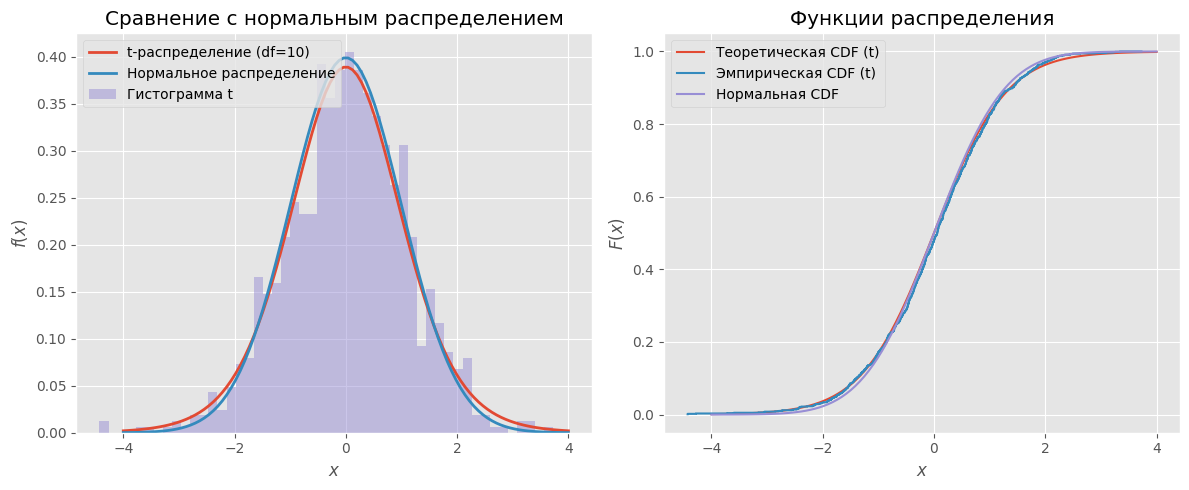

In [2]:
print("\n" + "=" * 50)
print("РАСПРЕДЕЛЕНИЕ СТЬЮДЕНТА")
print("=" * 50)

# 2. Распределение Стьюдента (степени свободы = 10)
t_rv = stats.t(df=10)  # генератор распределения Стьюдента

sample_t = t_rv.rvs(1000, random_state=1)
print("Первые 10 значений выборки:", sample_t[:10])

# Плотность распределения
x_t = np.linspace(-4, 4, 100)
pdf_t = t_rv.pdf(x_t)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_t, pdf_t)
plt.title('Плотность распределения Стьюдента')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

points_t = [-2, 0, 2]
plt.scatter(points_t, t_rv.pdf(points_t), color="red")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_t = t_rv.cdf(x_t)
plt.plot(x_t, cdf_t)
plt.title('Функция распределения Стьюдента')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_t, pdf_t)
plt.title('Вероятность P(-1 < X < 1)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq_t = np.linspace(-1, 1, 100)
yq_t = t_rv.pdf(xq_t)
plt.fill_between(xq_t, 0, yq_t, color='red', alpha=0.2)

plt.axvline(-1, color='red', linestyle="--", lw=2)
plt.axvline(1, color='red', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
q_t = t_rv.ppf(0.975)
print(f"97.5%-квантиль распределения Стьюдента: {q_t:.3f}")

# Сравнение с нормальным распределением
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
norm_rv = stats.norm(loc=0, scale=1)
plt.plot(x_t, pdf_t, lw=2, label='t-распределение (df=10)')
plt.plot(x_t, norm_rv.pdf(x_t), lw=2, label='Нормальное распределение')
plt.hist(sample_t, bins=50, density=True, alpha=0.5, label='Гистограмма t')
plt.title('Сравнение с нормальным распределением')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_t, cdf_t, label='Теоретическая CDF (t)')
ecdf_t = ECDF(sample_t)
plt.step(ecdf_t.x, ecdf_t.y, label='Эмпирическая CDF (t)')
plt.plot(x_t, norm_rv.cdf(x_t), label='Нормальная CDF')
plt.title('Функции распределения')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show()


РАСПРЕДЕЛЕНИЕ ФИШЕРА
Первые 10 значений выборки: [3.19969083 1.0905946  3.66812373 6.90048868 3.22019054 1.27514858
 0.241208   2.26443537 0.60784578 0.8501722 ]


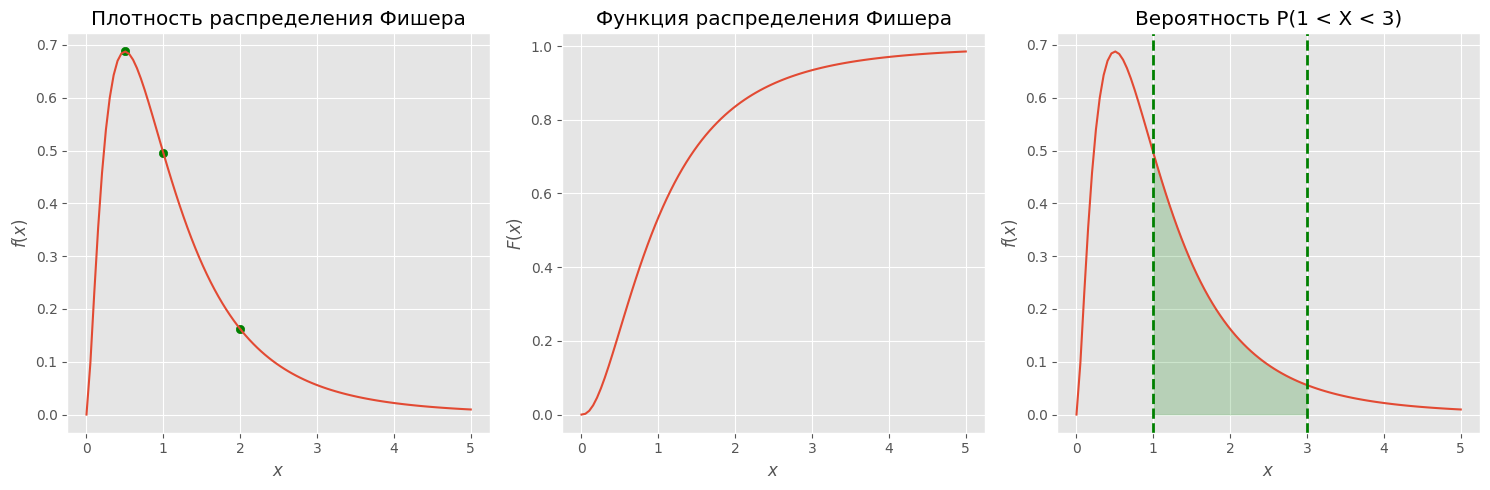

95%-квантиль распределения Фишера: 3.326


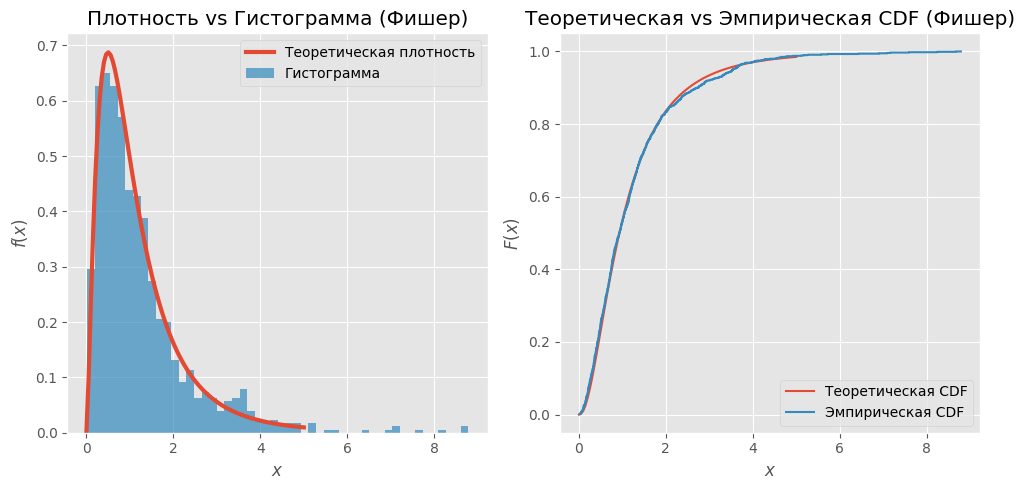

In [3]:
print("\n" + "=" * 50)
print("РАСПРЕДЕЛЕНИЕ ФИШЕРА")
print("=" * 50)

# 3. Распределение Фишера (степени свободы 5 и 10)
f_rv = stats.f(dfn=5, dfd=10)  # генератор распределения Фишера

sample_f = f_rv.rvs(1000, random_state=1)
print("Первые 10 значений выборки:", sample_f[:10])

# Плотность распределения
x_f = np.linspace(0, 5, 100)
pdf_f = f_rv.pdf(x_f)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_f, pdf_f)
plt.title('Плотность распределения Фишера')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

points_f = [0.5, 1, 2]
plt.scatter(points_f, f_rv.pdf(points_f), color="green")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_f = f_rv.cdf(x_f)
plt.plot(x_f, cdf_f)
plt.title('Функция распределения Фишера')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_f, pdf_f)
plt.title('Вероятность P(1 < X < 3)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq_f = np.linspace(1, 3, 100)
yq_f = f_rv.pdf(xq_f)
plt.fill_between(xq_f, 0, yq_f, color='green', alpha=0.2)

plt.axvline(1, color='green', linestyle="--", lw=2)
plt.axvline(3, color='green', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
q_f = f_rv.ppf(0.95)
print(f"95%-квантиль распределения Фишера: {q_f:.3f}")

# Сравнение теоретической плотности и гистограммы
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_f, pdf_f, lw=3, label='Теоретическая плотность')
plt.hist(sample_f, bins=50, density=True, alpha=0.7, label='Гистограмма')
plt.title('Плотность vs Гистограмма (Фишер)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_f, cdf_f, label='Теоретическая CDF')
ecdf_f = ECDF(sample_f)
plt.step(ecdf_f.x, ecdf_f.y, label='Эмпирическая CDF')
plt.title('Теоретическая vs Эмпирическая CDF (Фишер)')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show() 

ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
Первые 10 значений выборки: [1.07921167e+00 2.54825051e+00 2.28762717e-04 7.20025510e-01
 3.17419190e-01 1.93767743e-01 4.12229268e-01 8.47952964e-01
 1.01090508e+00 1.54791955e+00]


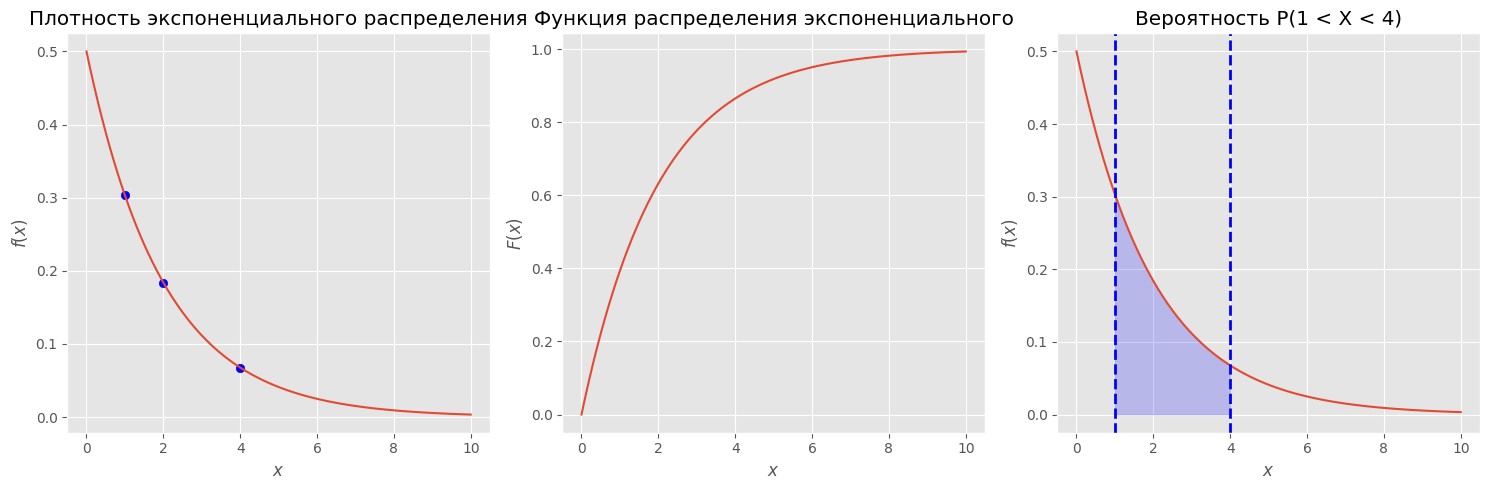

95%-квантиль экспоненциального распределения: 5.991


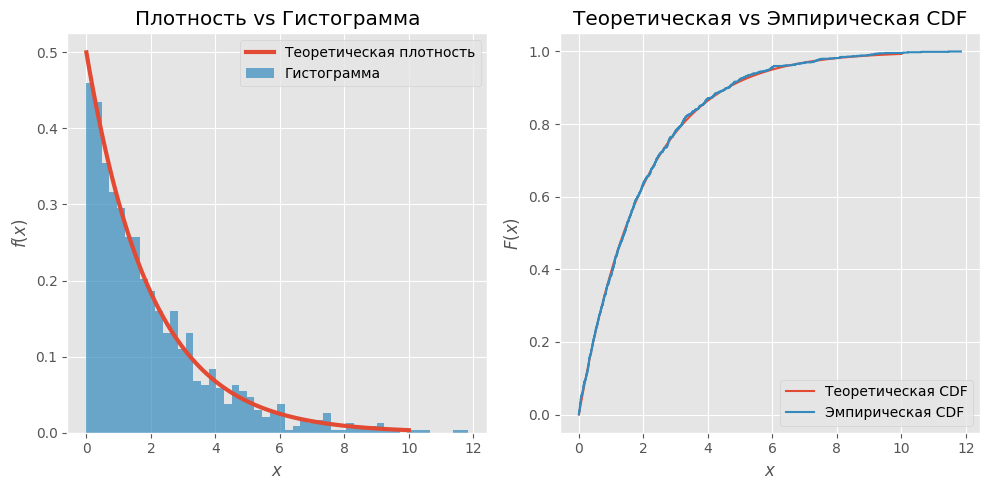

In [4]:
print("=" * 50)
print("ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ")
print("=" * 50)

# 1. Экспоненциальное распределение (λ = 0.5, scale = 2)
exp_rv = stats.expon(scale=2)  # генератор экспоненциального распределения

sample_exp = exp_rv.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print("Первые 10 значений выборки:", sample_exp[:10])

# Плотность распределения
x_exp = np.linspace(0, 10, 100)
pdf_exp = exp_rv.pdf(x_exp)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_exp, pdf_exp)
plt.title('Плотность экспоненциального распределения')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Отметим несколько точек
points = [1, 2, 4]
plt.scatter(points, exp_rv.pdf(points), color="blue")

# Функция распределения
plt.subplot(1, 3, 2)
cdf_exp = exp_rv.cdf(x_exp)
plt.plot(x_exp, cdf_exp)
plt.title('Функция распределения экспоненциального')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# Вероятность попадания в интервал
plt.subplot(1, 3, 3)
plt.plot(x_exp, pdf_exp)
plt.title('Вероятность P(1 < X < 4)')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Закрасим область между 1 и 4
xq_exp = np.linspace(1, 4, 100)
yq_exp = exp_rv.pdf(xq_exp)
plt.fill_between(xq_exp, 0, yq_exp, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(4, color='blue', linestyle="--", lw=2)

plt.tight_layout()
plt.show()

# Квантили
uroven_exp = 0.95
q_exp = exp_rv.ppf(uroven_exp)
print(f"95%-квантиль экспоненциального распределения: {q_exp:.3f}")

# Сравнение теоретической плотности и гистограммы
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_exp, pdf_exp, lw=3, label='Теоретическая плотность')
plt.hist(sample_exp, bins=50, density=True, alpha=0.7, label='Гистограмма')
plt.title('Плотность vs Гистограмма')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

# Сравнение теоретической и эмпирической функций распределения
plt.subplot(1, 2, 2)
plt.plot(x_exp, cdf_exp, label='Теоретическая CDF')
ecdf_exp = ECDF(sample_exp)
plt.step(ecdf_exp.x, ecdf_exp.y, label='Эмпирическая CDF')
plt.title('Теоретическая vs Эмпирическая CDF')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
print("Статистики для выборки из распределения Хи-квадрат:")

# Выборочное среднее
mean_val = np.mean(sample_chi2)
print(f"  Выборочное среднее: {mean_val:.4f}")

# Выборочная дисперсия (с ddof=1)
var_val = np.var(sample_chi2, ddof=1)
print(f"  Выборочная дисперсия: {var_val:.4f}")

# Выборочная медиана
median_val = np.median(sample_chi2)
print(f"  Выборочная медиана: {median_val:.4f}")

# 0.75-квантиль
quantile_75 = np.quantile(sample_chi2, q=0.75)
print(f"  0.75-квантиль: {quantile_75:.4f}")

# Интерквартильный размах (IQR)
iqr_val = stats.iqr(sample_chi2)
print(f"  Интерквартильный размах (IQR): {iqr_val:.4f}")

# Коэффициент асимметрии
skew_val = stats.skew(sample_chi2)
print(f"  Коэффициент асимметрии: {skew_val:.4f}")

# Коэффициент эксцесса
kurt_val = stats.kurtosis(sample_chi2)
print(f"  Коэффициент эксцесса: {kurt_val:.4f}")

Статистики для выборки из распределения Хи-квадрат:
  Выборочное среднее: 5.1057
  Выборочная дисперсия: 11.1194
  Выборочная медиана: 4.3617
  0.75-квантиль: 6.7990
  Интерквартильный размах (IQR): 4.0843
  Коэффициент асимметрии: 1.3682
  Коэффициент эксцесса: 3.4431


In [6]:
print("\nСтатистики для выборки из распределения Стьюдента:")
# sample_t - это переменная с выборкой из Стьюдента из Задачи 1

mean_val = np.mean(sample_t)
print(f"  Выборочное среднее: {mean_val:.4f}")
var_val = np.var(sample_t, ddof=1)
print(f"  Выборочная дисперсия: {var_val:.4f}")
median_val = np.median(sample_t)
print(f"  Выборочная медиана: {median_val:.4f}")
quantile_75 = np.quantile(sample_t, q=0.75)
print(f"  0.75-квантиль: {quantile_75:.4f}")
iqr_val = stats.iqr(sample_t)
print(f"  Интерквартильный размах (IQR): {iqr_val:.4f}")
skew_val = stats.skew(sample_t)
print(f"  Коэффициент асимметрии: {skew_val:.4f}")
kurt_val = stats.kurtosis(sample_t)
print(f"  Коэффициент эксцесса: {kurt_val:.4f}")


Статистики для выборки из распределения Стьюдента:
  Выборочное среднее: 0.0256
  Выборочная дисперсия: 1.1850
  Выборочная медиана: 0.0597
  0.75-квантиль: 0.7434
  Интерквартильный размах (IQR): 1.3981
  Коэффициент асимметрии: -0.1929
  Коэффициент эксцесса: 0.5509


In [7]:
print("\nСтатистики для выборки из распределения Фишера:")
# sample_f - это переменная с выборкой из Фишера из Задачи 1

mean_val = np.mean(sample_f)
print(f"  Выборочное среднее: {mean_val:.4f}")
var_val = np.var(sample_f, ddof=1)
print(f"  Выборочная дисперсия: {var_val:.4f}")
median_val = np.median(sample_f)
print(f"  Выборочная медиана: {median_val:.4f}")
quantile_75 = np.quantile(sample_f, q=0.75)
print(f"  0.75-квантиль: {quantile_75:.4f}")
iqr_val = stats.iqr(sample_f)
print(f"  Интерквартильный размах (IQR): {iqr_val:.4f}")
skew_val = stats.skew(sample_f)
print(f"  Коэффициент асимметрии: {skew_val:.4f}")
kurt_val = stats.kurtosis(sample_f)
print(f"  Коэффициент эксцесса: {kurt_val:.4f}")


Статистики для выборки из распределения Фишера:
  Выборочное среднее: 1.2581
  Выборочная дисперсия: 1.3074
  Выборочная медиана: 0.9315
  0.75-квантиль: 1.5806
  Интерквартильный размах (IQR): 1.0784
  Коэффициент асимметрии: 2.3609
  Коэффициент эксцесса: 8.3287


In [8]:
mean_val = np.mean(sample_exp)
print(f"  Выборочное среднее: {mean_val:.4f}")
var_val = np.var(sample_exp, ddof=1)
print(f"  Выборочная дисперсия: {var_val:.4f}")
median_val = np.median(sample_exp)
print(f"  Выборочная медиана: {median_val:.4f}")
quantile_75 = np.quantile(sample_exp, q=0.75)
print(f"  0.75-квантиль: {quantile_75:.4f}")
iqr_val = stats.iqr(sample_exp)
print(f"  Интерквартильный размах (IQR): {iqr_val:.4f}")
skew_val = stats.skew(sample_exp)
print(f"  Коэффициент асимметрии: {skew_val:.4f}")
kurt_val = stats.kurtosis(sample_exp)
print(f"  Коэффициент эксцесса: {kurt_val:.4f}")

  Выборочное среднее: 1.9850
  Выборочная дисперсия: 3.7266
  Выборочная медиана: 1.4165
  0.75-квантиль: 2.7780
  Интерквартильный размах (IQR): 2.1974
  Коэффициент асимметрии: 1.7201
  Коэффициент эксцесса: 3.4926


Первые 5 средних из 10000: [np.float64(1.6415076483983233), np.float64(1.846101560141804), np.float64(1.589808063440087), np.float64(2.3281369526168407), np.float64(2.315626759385594)]


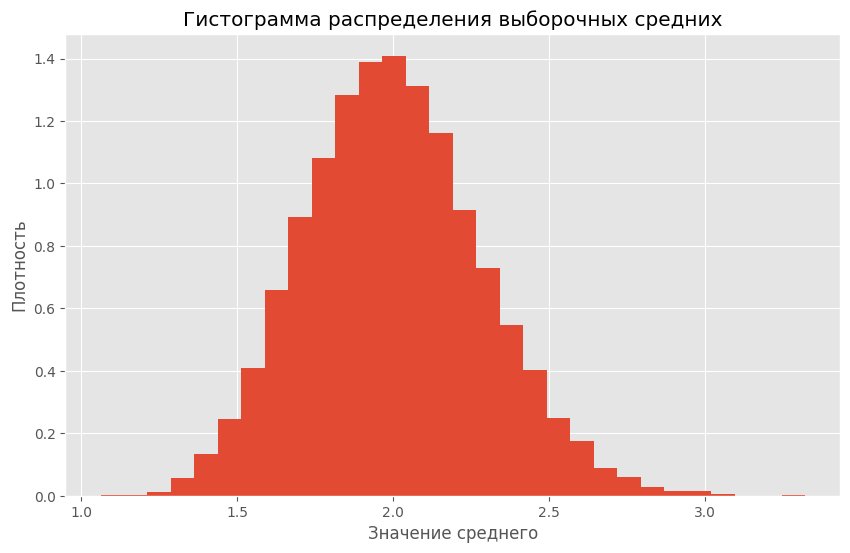

In [9]:
# Параметры эксперимента
sample_size = 50     # Размер каждой выборки
n_samples = 10000      # Количество выборок (и, соответственно, средних)

# Наш генератор экспоненциального распределения из Задачи 1
# expon_rv = stats.expon(scale=1.0)

# Создаем пустой список, куда будем складывать средние значения
means = []

for _ in range(n_samples):
    # 1. Генерируем одну выборку размера sample_size
    one_sample = exp_rv.rvs(size=sample_size)
    
    # 2. Считаем ее среднее
    one_mean = np.mean(one_sample)
    
    # 3. Добавляем это среднее в наш список
    means.append(one_mean)

# Посмотрим на первые 5 полученных средних
print(f"Первые 5 средних из {n_samples}: {means[:5]}")
# Строим гистограмму распределения выборочных средних
plt.figure(figsize=(10, 6))
plt.hist(means, bins=30, density=True)
plt.title('Гистограмма распределения выборочных средних')
plt.xlabel('Значение среднего')
plt.ylabel('Плотность')
plt.show()

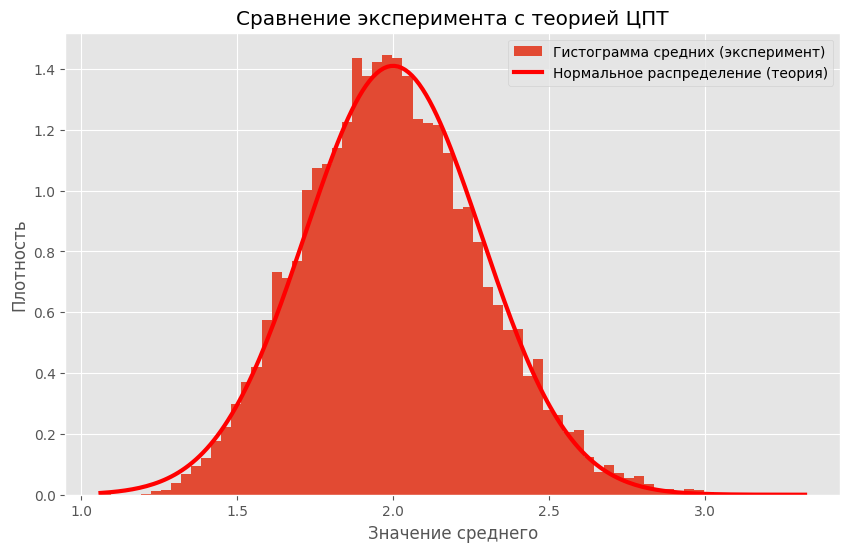

In [10]:
# Теоретические среднее и стандартное отклонение по ЦПТ
mu_theory = exp_rv.mean()
sigma_theory = exp_rv.std() / np.sqrt(sample_size)

# Создаем "идеальное" нормальное распределение
norm_theory_rv = stats.norm(loc=mu_theory, scale=sigma_theory)

# --- Рисуем графики ---
plt.figure(figsize=(10, 6))

# 1. Наша гистограмма из эксперимента
plt.hist(means, bins=70, density=True, label='Гистограмма средних (эксперимент)')

# 2. Идеальная теоретическая кривая
x_values = np.linspace(min(means), max(means), 200)
pdf_theory = norm_theory_rv.pdf(x_values)
plt.plot(x_values, pdf_theory, color='red', linewidth=3, label='Нормальное распределение (теория)')

plt.title('Сравнение эксперимента с теорией ЦПТ')
plt.xlabel('Значение среднего')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Первые 5 средних из 10000: [np.float64(0.4623450985628958), np.float64(0.44478299858373427), np.float64(0.50331437835993), np.float64(0.5004984906248908), np.float64(0.47655568975522805)]


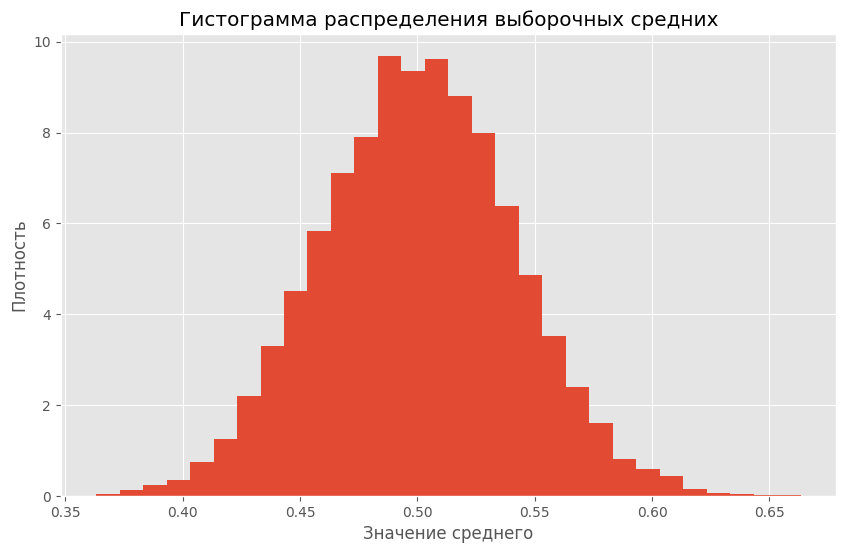

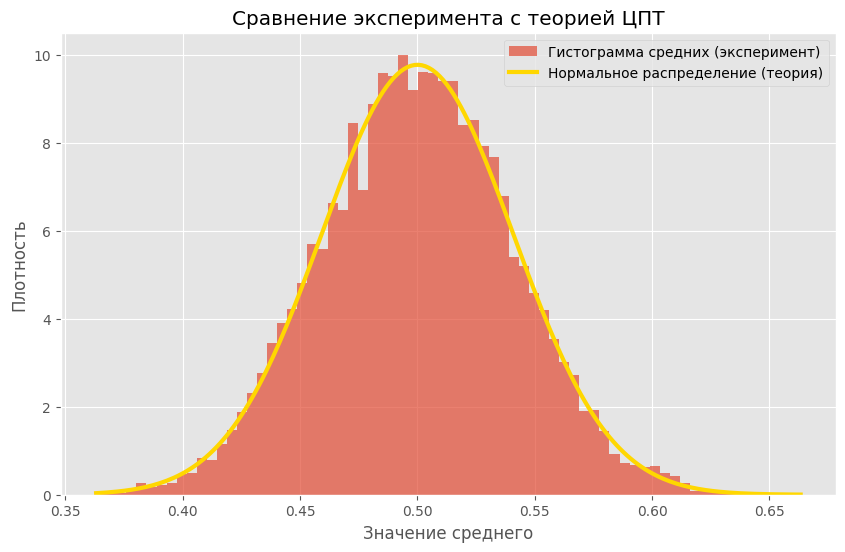

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Параметры эксперимента
sample_size = 50     # Размер каждой выборки
n_samples = 10000    # Количество выборок

# Генератор равномерного распределения
uniform_rv = stats.uniform()

# Создаем пустой список, куда будем складывать средние значения
means = []

for _ in range(n_samples):
    # 1. Генерируем одну выборку размера sample_size из равномерного распределения
    one_sample = uniform_rv.rvs(size=sample_size)
    
    # 2. Считаем ее среднее
    one_mean = np.mean(one_sample)
    
    # 3. Добавляем это среднее в наш список
    means.append(one_mean)

# Посмотрим на первые 5 полученных средних
print(f"Первые 5 средних из {n_samples}: {means[:5]}")

# Строим гистограмму распределения выборочных средних
plt.figure(figsize=(10, 6))
plt.hist(means, bins=30, density=True)
plt.title('Гистограмма распределения выборочных средних')
plt.xlabel('Значение среднего')
plt.ylabel('Плотность')
plt.show()

# Теоретические среднее и стандартное отклонение по ЦПТ для равномерного распределения
mu_theory = uniform_rv.mean()  # = 0.5
sigma_theory = uniform_rv.std() / np.sqrt(sample_size)  

# Создаем "идеальное" нормальное распределение
norm_theory_rv = stats.norm(loc=mu_theory, scale=sigma_theory)

# --- Рисуем графики ---
plt.figure(figsize=(10, 6))

# 1. Наша гистограмма из эксперимента
plt.hist(means, bins=70, density=True, alpha=0.7, label='Гистограмма средних (эксперимент)')

# 2. Идеальная теоретическая кривая
x_values = np.linspace(min(means), max(means), 200)
pdf_theory = norm_theory_rv.pdf(x_values)
plt.plot(x_values, pdf_theory, color='gold', linewidth=3, label='Нормальное распределение (теория)')

plt.title('Сравнение эксперимента с теорией ЦПТ')
plt.xlabel('Значение среднего')
plt.ylabel('Плотность')
plt.legend()
plt.show()